## Basic Analysis
### 1. Dates of Reviews
- What are the dates of the earliest and most recent reviews?

In [55]:
import pandas as pd

reviews = pd.read_csv("airbnb_last_review.tsv", sep='\t')

earliest_review = reviews['last_review'].min()
most_recent_review = reviews['last_review'].max()


In [2]:
print(earliest_review)

April 01 2019


In [3]:
print(most_recent_review)

May 31 2019


## 2. Private Room Listings
- Count the number of private room listings.

In [8]:
import pandas as pd

room_types = pd.read_excel("airbnb_room_type.xlsx")
room_types

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt
...,...,...,...
25204,36425863,Lovely Privet Bedroom with Privet Restroom,PRIVATE ROOM
25205,36427429,No.2 with queen size bed,PRIVATE ROOM
25206,36438336,Seas The Moment,Private room
25207,36442252,1B-1B apartment near by Metro,Entire home/apt


In [9]:
room_types['room_type']

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
3           private room
4        Entire home/apt
              ...       
25204       PRIVATE ROOM
25205       PRIVATE ROOM
25206       Private room
25207    Entire home/apt
25208       Private room
Name: room_type, Length: 25209, dtype: object

## 3. Average Price Calculation
- Calculate the average listing price.

In [18]:
import pandas as pd

prices = pd.read_csv("airbnb_price.csv")

prices['price_cleaned'] = prices['price'].str.extract('(\d+)').astype(float)

average_price = prices['price_cleaned'].mean()
average_price

141.7779364512674

## 4. Summary Table
- Combine calculated values into a DataFrame with one row.

In [28]:
import pandas as pd


# Create the summary DataFrame
summary = pd.DataFrame({
    'earliest_review': [earliest_review],
    'most_recent_review': [most_recent_review],
    'avg_price': [average_price],
    'private_room': [private_room]
})

summary


,earliest_review,most_recent_review,avg_price
0,April 01 2019,May 31 2019,141.777936


## Intermediate Analysis
### 5. Neighborhood Trends
- Identify the top 5 neighborhoods with the highest average prices.

In [40]:
import pandas as pd

prices = pd.read_csv("airbnb_price.csv")

prices['price_cleaned'] = prices['price'].str.extract('(\d+)').astype(float)

neighbourhood = prices.nlargest(5, 'price_cleaned')

neighbourhood


,listing_id,price,nbhood_full,price_cleaned
23916,34895693,7500 dollars,"Brooklyn, East Flatbush",7500.0
22085,33397385,5100 dollars,"Manhattan, Midtown",5100.0
18430,30035166,5000 dollars,"Manhattan, Harlem",5000.0
21731,33029434,3613 dollars,"Manhattan, Upper West Side",3613.0
12508,22263855,3000 dollars,"Manhattan, SoHo",3000.0


## 6. Word Analysis in Descriptions
- Find the top 10 most frequently used words in the description column.

In [45]:
import pandas as pd

from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

room_types = pd.read_excel("airbnb_room_type.xlsx")

all_words = room_types['description'].str.lower().str.split().explode()
filtered_words = [word for word in map(str, all_words) if word.isalpha() and word not in ENGLISH_STOP_WORDS]
count = Counter(filtered_words)
common_words = count.most_common(10)
common_words

[('room', 4762),
 ('private', 3974),
 ('bedroom', 3468),
 ('apartment', 2952),
 ('cozy', 2556),
 ('brooklyn', 1933),
 ('studio', 1848),
 ('apt', 1731),
 ('manhattan', 1673),
 ('spacious', 1560)]

## Advanced Analysis
### 7. Room Type Comparison
- Compare average prices for each room type and create a bar chart.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

prices = pd.read_csv("airbnb_price.csv")

In [ ]:
private_room = prices["room_type"].value_counts()["PRIVATE ROOM"]
priv_avg = private_room.mean()
priv_avg

In [ ]:
shared_room = prices["room_type"].value_counts()["SHARED ROOM"]
room_avg = shared_room.mean()
room_avg

In [ ]:
entire_home = prices["room_type"].value_counts()["Entire home/apt"]
home_avg = entire_home.mean()
home_avg

## 8. Trend Over Time
- Plot the trend of reviews per month.

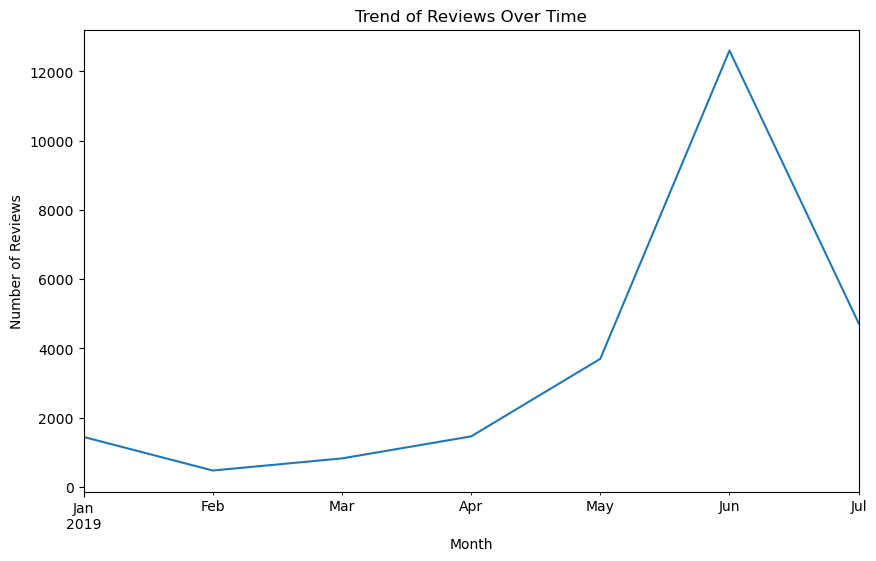

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv("airbnb_last_review.tsv", sep='\t')
reviews['last_review'] = pd.to_datetime(reviews['last_review'], errors='coerce')

reviews['month'] = reviews['last_review'].dt.to_period('M')
monthly_reviews = reviews.groupby('month').size()

monthly_reviews.plot(kind='line', figsize=(10, 6))
plt.title('Trend of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()


### 9.Exploring Unique Matplotlib Functions
Create a scatter plot with a regression line showing the relationship between price and the length of the description.
Use matplotlib.axes.Axes.annotate to highlight outliers in the graph. (Note: Students should explore this function independently.)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
prices = pd.read_csv("airbnb_price.csv")
room_types = pd.read_excel("airbnb_room_type.xlsx")

# Merge datasets
merged_data = pd.merge(prices, room_types, on='listing_id')

# Calculate description length
merged_data['description_length'] = merged_data['description'].str.len()

# Ensure price is numeric
merged_data['price'] = pd.to_numeric(merged_data['price'], errors='coerce')
merged_data = merged_data.dropna(subset=['price', 'description_length'])

# Define x and y
x = merged_data['description_length']
y = merged_data['price']

# Fit regression line
coef = np.polyfit(x, y, 1)
reg_line = np.poly1d(coef)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.6, label="Data Points")
plt.plot(x, reg_line(x), color='red', label="Regression Line")

# Annotate outliers with price > 500
outliers = merged_data[merged_data['price'] > 500]
for i, row in outliers.iterrows():
    plt.annotate(f"${int(row['price'])}", 
                 (row['description_length'], row['price']), 
                 textcoords="offset points", xytext=(0, 10), ha='center', color="green")

# Add titles and labels
plt.title("Scatter Plot: Price vs Description Length")
plt.xlabel("Description Length")
plt.ylabel("Price (USD)")
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


TypeError: expected non-empty vector for x

### 10. Exploring Unique Seaborn Functions

Generate a strip plot for prices grouped by room_type using the hue parameter to distinguish neighborhoods.
Students should explore the seaborn.stripplot function.

In [2]:
import seaborn as sns

prices[['borough', 'neighborhood']] = prices['nbhood_full'].str.split(', ', expand=True)
merged_data = pd.merge(prices, room_types, on='listing_id')

plt.figure(figsize=(12, 6))
sns.stripplot(
    x='room_type',
    y='price',
    hue='borough',
    data=merged_data,
    jitter=True,
    dodge=True,
    alpha=0.7,
    palette='Set2'
)

plt.title("Strip Plot of Prices Grouped by Room Type with Boroughs Highlighted")
plt.xlabel("Room Type")
plt.ylabel("Price (USD)")
plt.legend(title="Borough", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Visualization Questions
### 11. Bar Chart
- Show the count of listings for each room type.

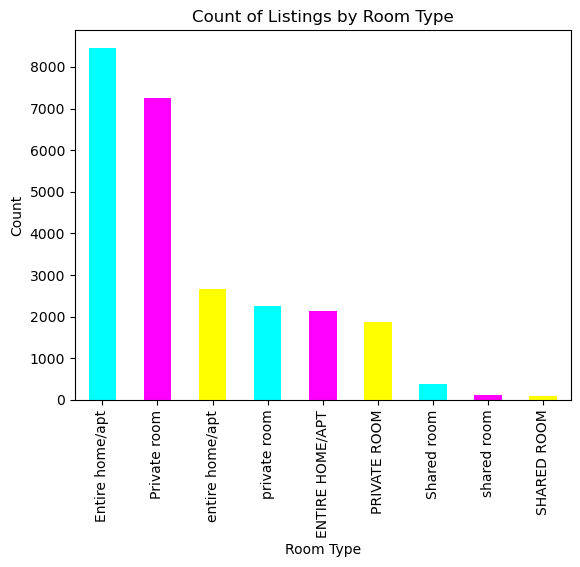

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

room_type_counts = room_types['room_type'].value_counts()

room_type_counts.plot(kind='bar', color=['cyan', 'magenta', 'yellow'])
plt.title('Count of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


### 12. Heatmap
- Show the correlation between listing price and frequency of reviews.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prices = pd.read_csv("airbnb_price.csv")
reviews = pd.read_csv("airbnb_last_review.tsv", sep='\t')
reviews['last_review'] = pd.to_datetime(reviews['last_review'], errors='coerce')
merged_data = pd.merge(prices, reviews, on='listing_id')

correlation_data = merged_data[['price', 'last_review']].dropna()
correlation_matrix = correlation_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### 13. Pie Chart
- Visualize the proportion of room types available.

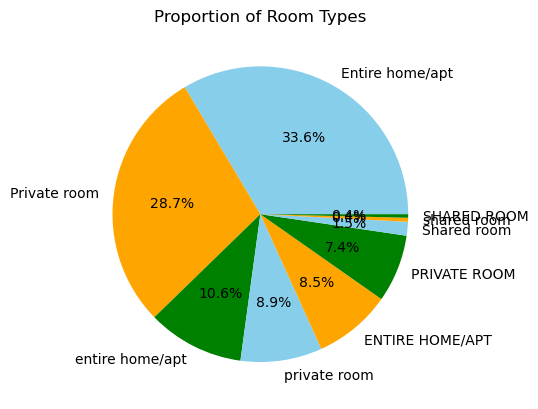

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

room_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange', 'green'])
plt.title('Proportion of Room Types')
plt.ylabel('')
plt.show()

### 14. Histogram
- Show the distribution of listing prices.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prices['price'].plot(kind='hist', bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


### 15. Violin Plot
- Compare price distributions across neighborhoods.

In [4]:
import seaborn
df=pd.DataFrame({"neighbourhood":bnb_csv['nbhood_full'],
                "price":bnb_csv['price']})
# Set Seaborn style
sns.set(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='neighbourhood', y='price', data=df)

# Customize the plot
plt.title('Price Distribution Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.grid(True)

# Show the plot
plt.show()